In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('troop_movements.csv')

In [7]:
emp_res = data.groupby('empire_or_resistance').size()
print(emp_res)

empire_or_resistance
empire        516
resistance    484
dtype: int64


In [9]:
homeworld = data.groupby('homeworld').size()
print(homeworld)

homeworld
Alderaan        20
Aleen Minor     19
Bestine IV      28
Cerea           25
Champala        29
Chandrila       29
Concord Dawn    29
Corellia        20
Dagobah         20
Dathomir        32
Dorin           23
Eriadu          23
Glee Anselm     23
Haruun Kal      21
Iktotch         26
Iridonia        21
Kalee           22
Kashyyyk        32
Malastare       28
Mirial          21
Mon Cala        23
Muunilinst      16
Naboo           20
Ojom            25
Quermia         31
Rodia           26
Ryloth          18
Serenno         27
Shili           24
Skako           25
Socorro         20
Stewjon         19
Sullust         20
Tatooine        24
Tholoth         26
Toydaria        26
Trandosha       29
Troiken         19
Tund            25
Umbara          22
Vulpter         23
Zolan           21
dtype: int64


In [10]:
unit_type = data.groupby('unit_type').size()
print(unit_type)

unit_type
at-at                 129
at-st                 124
resistance_soldier    110
stormtrooper          133
tie_fighter           106
tie_silencer          140
unknown               134
x-wing                124
dtype: int64


In [24]:
# data['is_resistance'] = "true" if data['empire_or_resistance'] == "resistance" else "false"
# 'empire_or_resistance'. Resistance=1 and Empire=0
data['is_resistance'] = data['empire_or_resistance'].apply(lambda x: x == 'resistance')
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 09:39:49        1              x-wing           resistance   
1  2024-07-11 09:39:48        2        stormtrooper               empire   
2  2024-07-11 09:39:47        3        stormtrooper               empire   
3  2024-07-11 09:39:46        4        stormtrooper               empire   
4  2024-07-11 09:39:45        5  resistance_soldier               empire   

   location_x  location_y  destination_x  destination_y  homeworld  \
0           7           9              3              7  Malastare   
1          10           8              2              9      Kalee   
2          10           4             10              1     Umbara   
3           5           1              2              2       Tund   
4           6           4              7              9      Rodia   

   is_resistance  
0           True  
1          False  
2          False  
3          False  
4          False  


In [25]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


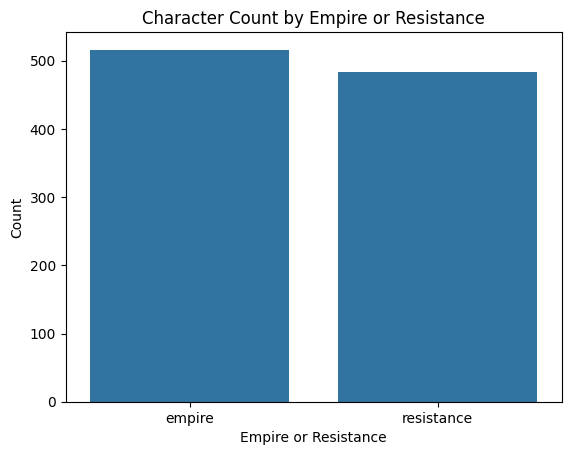

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# size_distribution = socksDF.groupBy("Size").count().toPandas()
# sns.barplot(x="Size", y="count", data=size_distribution)
# plt.title("Distribution of Socks by Size")
# plt.show()

emp_res = data.groupby('empire_or_resistance').size()

emp_res2 = data.groupby('empire_or_resistance').count()
sns.barplot(x='empire_or_resistance', y=emp_res, data=emp_res2)
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.title('Character Count by Empire or Resistance')
plt.show()


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

X = data[['homeworld','unit_type']]
y = data['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

# Define categorical features for one-hot encoding
categorical_features = ['homeworld', 'unit_type']



# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)


# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

new_character = pd.DataFrame({
    'unit_type' : ["x-wing"],
    'homeworld' : ["Tund"]
})

new_character_encoded = preprocessor.transform(new_character)

# Ensure new customer data matches the same feature set used in training
predicted_frequent_loser = model.predict(new_character_encoded)
print(predicted_frequent_loser)

Accuracy: 0.545
['empire']


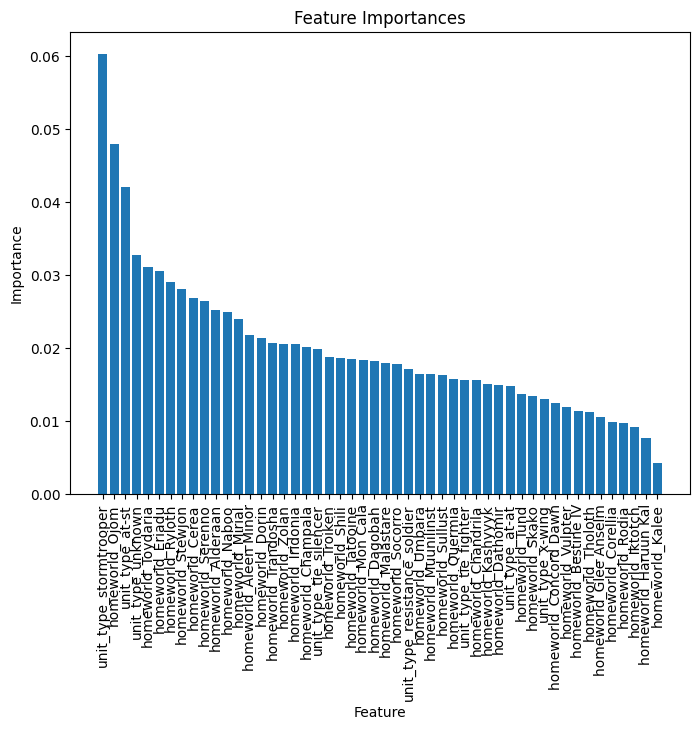

Most Influential Unit Type: unit_type_stormtrooper


In [61]:
features = ['homeworld', 'unit_type']
target = 'is_resistance'
X = data[features]
y = data[target]

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title("Feature Importances")
plt.show()

most_influential_unit_type = feature_importances.iloc[0]['Feature']
print('Most Influential Unit Type:', most_influential_unit_type)


In [62]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [70]:
data = pd.read_csv('troop_movements10m.csv')

data['unit_type'] = data['unit_type'].apply(lambda x: "unknown" if x == 'invalid_unit' else x)
# display(data)

data = data.ffill()
display(data)


,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


In [72]:
! pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
! pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/466.9 kB ? eta -:--:--
     - -------------------------------------- 20.5/466.9 kB ? eta -:--:--
     - -------------------------------------- 20.5/466.9 kB ? eta -:--:--
     - -------------------------------------- 20.5/466.9 kB ? eta -:--:--
     -- ---------------------------------- 30.7/466.9 kB 163.8 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/466.9 kB 163.8 kB/s eta 0:00:03
     --- --------------------------------- 41.0/466.9 kB 163.4 kB/s eta 0:00:03
     --- --------------------------------- 41.0/466.9 kB 163.4 kB/s eta 0:00:03
     ----- ------------------------------- 71.7/466.9 kB 231.0 kB/s eta 0:00:02
     ------- ----------------------------- 92.2/466.9 kB 249.8 kB/s eta 0:00:02
     -------------- --------------------- 184.3/466.9 kB 484.9 kB/s eta 0:00:01
     -------------------------------------- 466.9/466.9 kB 1.1 MB/s

  error: subprocess-exited-with-error
  
  × Building wheel for fastparquet (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [140 lines of output]
      fatal: not a git repository (or any of the parent directories): .git
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\wasadmin\AppData\Local\Temp\2\pip-build-env-fx2xqsoa\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\fastparquet
      copying fastparquet\api.py -> build\lib.win-amd64-cpython-312\fastpar

In [74]:
import pyarrow

data.to_parquet('troop_movements10m.parquet', engine='pyarrow')

In [77]:
import pyarrow.parquet as pq

parquet_file = 'troop_movements10m.parquet' 
# Read the Parquet file 
table = pq.read_table(parquet_file) 
# Convert to Pandas DataFrame 
df = table.to_pandas() 
#Display the DataFrame 
print(df)

                   timestamp   unit_id           unit_type  location_x  \
0        2023-06-13 17:33:18         1               at-st         2.0   
1        2023-06-13 17:33:17         2        tie_silencer         4.0   
2        2023-06-13 17:33:16         3               at-at         0.0   
3        2023-06-13 17:33:15         4        tie_silencer         6.0   
4        2023-06-13 17:33:14         5         tie_fighter         0.0   
...                      ...       ...                 ...         ...   
9999995  2023-02-18 10:26:20   9999996  resistance_soldier         6.0   
9999996  2023-02-18 10:26:19   9999997        tie_silencer         8.0   
9999997  2023-02-18 10:26:18   9999998         tie_fighter         7.0   
9999998  2023-02-18 10:26:17   9999999         tie_fighter         6.0   
9999999  2023-02-18 10:26:16  10000000             unknown         6.0   

         location_y  destination_x  destination_y    homeworld  
0               8.0              1            

In [78]:
with open('trained_model.pkl', 'rb') as f: loaded_data = pickle.load(f)

In [ ]:
X = df[['homeworld','unit_type']]
y = df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

# Define categorical features for one-hot encoding
categorical_features = ['homeworld', 'unit_type']



# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)


# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
